In [2]:
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Activation
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


##  Load the dataset

In [29]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [30]:
print('Train set size : ', X_train.shape[0])
print('Test set size : ', X_test.shape[0])

Train set size :  60000
Test set size :  10000


## Looking at a random image in dataset

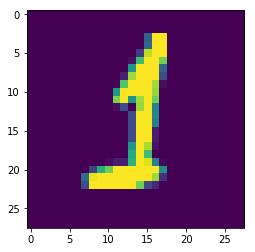

In [19]:
plt.imshow(X_train[552])

In [5]:
print("The given image has digit", y_train[552])

The given image has digit 1


## Flattening the pixel values into 1D array

In [31]:
X_train = X_train.reshape((60000,-1)) /255.0
X_test = X_test.reshape((X_test.shape[0],-1)) /255.0

## One-hot encoding on categorical labels

In [32]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [33]:
print("Shape of X_train after flattening:", X_train.shape)
print("Shape of y_train after one-hot encoding:", y_train.shape)

Shape of X_train after flattening: (60000, 784)
Shape of y_train after one-hot encoding: (60000, 10)


## Defining a neural net with 2 hidden layers each having 128 neurons

In [34]:
model = Sequential([Dense(128, input_shape=(784,)),
                     Activation('relu'),
                     Dense(128),
                     Activation('relu'),
                     Dense(10),
                     Activation('softmax')])

## Compiling the model

In [35]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Fit the model - train it for 2 iterations

In [36]:
model.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.25)

Train on 45000 samples, validate on 15000 samples
Epoch 1/2
45000/45000 [==============================] - 17s 375us/step - loss: 0.2644 - acc: 0.9212 - val_loss: 0.1408 - val_acc: 0.9584
Epoch 2/2
45000/45000 [==============================] - 6s 126us/step - loss: 0.1145 - acc: 0.9660 - val_loss: 0.1135 - val_acc: 0.9682


## Evaluate

In [37]:
training_scores = model.evaluate(X_train, y_train)
test_scores = model.evaluate(X_test, y_test)
print("Training accuracy: {:.2f}%".format(training_scores[1]*100))
print("Test accuracy: {:.2f}%".format(test_scores[1]*100))

10000/10000 [==============================] - 0s 39us/step
Training accuracy: 97.73%
Test accuracy: 97.06%
